In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


importing dataset

In [2]:
dataset=pd.read_csv(r"C:\Users\Acer\Desktop\project\Book1 con.csv")

understanding dataset


In [3]:
dataset.shape

(1048575, 9)

In [4]:
dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,12/16/2006,17:24:00,4.216,0.418,234.84,18.4,0,1,17.0
1,12/16/2006,17:25:00,5.36,0.436,233.63,23,0,1,16.0
2,12/16/2006,17:26:00,5.374,0.498,233.29,23,0,2,17.0
3,12/16/2006,17:27:00,5.388,0.502,233.74,23,0,1,17.0
4,12/16/2006,17:28:00,3.666,0.528,235.68,15.8,0,1,17.0


In [5]:
dataset.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1048570,12/13/2008,21:34:00,0.426,0.076,242.27,1.8,0,0,0.0
1048571,12/13/2008,21:35:00,0.424,0.076,242.1,1.8,0,0,0.0
1048572,12/13/2008,21:36:00,0.422,0.076,241.73,1.8,0,0,0.0
1048573,12/13/2008,21:37:00,0.422,0.078,242.56,1.8,0,0,0.0
1048574,12/13/2008,21:38:00,0.422,0.078,242.61,1.8,0,0,0.0


In [6]:
print(f"The Dataset has {dataset.shape[0]} rows and {dataset.shape[1]} columns")

The Dataset has 1048575 rows and 9 columns


In [7]:
dataset.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

checking total null values in each colunmn


In [8]:
dataset.isnull().any()

Date                     False
Time                     False
Global_active_power      False
Global_reactive_power    False
Voltage                  False
Global_intensity         False
Sub_metering_1           False
Sub_metering_2           False
Sub_metering_3            True
dtype: bool

In [9]:
dataset.isnull().sum()

Date                        0
Time                        0
Global_active_power         0
Global_reactive_power       0
Voltage                     0
Global_intensity            0
Sub_metering_1              0
Sub_metering_2              0
Sub_metering_3           4069
dtype: int64

In [10]:
dataset.drop(["Date"],axis=1,inplace=True)

In [11]:
dataset1 = dataset.drop(["Time"],axis=1,inplace=True)

removing null values

understanding percent of data missing

In [12]:
percent_missing = dataset.isnull().sum() * 100 / len(dataset)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

In [13]:
missing_value_df

,percent_missing
Global_active_power,0.00000
Global_reactive_power,0.00000
Voltage,0.00000
Global_intensity,0.00000
Sub_metering_1,0.00000
Sub_metering_2,0.00000
Sub_metering_3,0.38805


handling the null values

In [14]:
dataset.loc[dataset.Sub_metering_3.isnull()].head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,?,?,?,?,?,?,NaN
6840,?,?,?,?,?,?,NaN
19724,?,?,?,?,?,?,NaN
19725,?,?,?,?,?,?,NaN
41832,?,?,?,?,?,?,NaN


In [15]:
dataset.replace('?',np.nan, inplace=True)

In [16]:
dataset.loc[dataset.Sub_metering_3.isnull()].head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19724,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19725,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41832,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
dataset = dataset.dropna(how = 'all')

In [18]:
for i in dataset.columns:
    dataset[i] = dataset[i].astype('float64')

In [19]:
dataset.shape

(1044506, 7)

adding another sub_metering_4 column

In [20]:
values = dataset.values
dataset['Sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

In [21]:
dataset.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
Sub_metering_4           float64
dtype: object

In [22]:
dataset.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
count,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06,1.044506e+06
mean,1.108202e+00,1.182732e-01,2.399598e+02,4.718123e+00,1.177451e+00,1.475177e+00,5.933837e+00,9.883571e+00
std,1.129546e+00,1.095062e-01,3.284504e+00,4.763588e+00,6.321183e+00,6.352703e+00,8.210398e+00,1.072921e+01
min,7.600000e-02,0.000000e+00,2.234900e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,2.880000e-01,0.000000e+00,2.379700e+02,1.200000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.733333e+00
50%,5.500000e-01,9.800000e-02,2.402100e+02,2.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.500000e+00
75%,1.544000e+00,1.860000e-01,2.421400e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.086667e+01
max,1.067000e+01,1.390000e+00,2.521400e+02,4.640000e+01,8.000000e+01,7.800000e+01,3.100000e+01,1.248333e+02


Data Visualization

C:\Users\Acer\anaconda3\envs\py3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Global_active_power', ylabel='Density'>

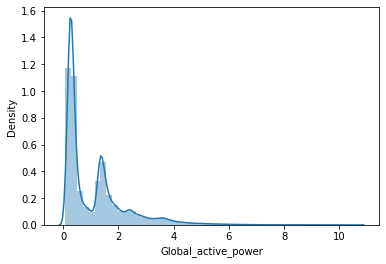

In [23]:
sns.distplot(dataset['Global_active_power'])

C:\Users\Acer\anaconda3\envs\py3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Global_active_power'>

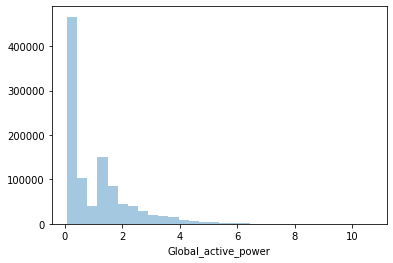

In [24]:
sns.distplot(dataset['Global_active_power'],kde=False,bins=30)

<AxesSubplot:xlabel='Global_reactive_power'>

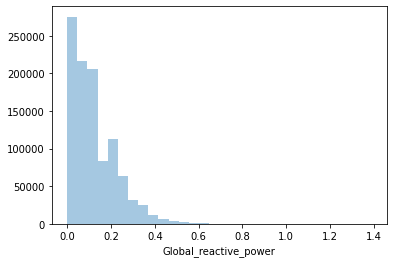

In [25]:
sns.distplot(dataset['Global_reactive_power'],kde=False,bins=30)

<AxesSubplot:xlabel='Voltage', ylabel='Density'>

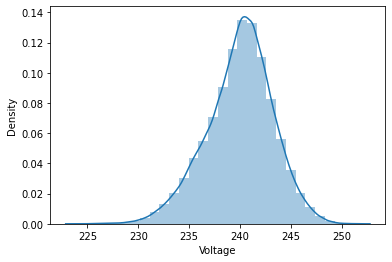

In [26]:
sns.distplot(dataset['Voltage'],kde=True,bins=30)

C:\Users\Acer\anaconda3\envs\py3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Global_intensity', ylabel='Density'>

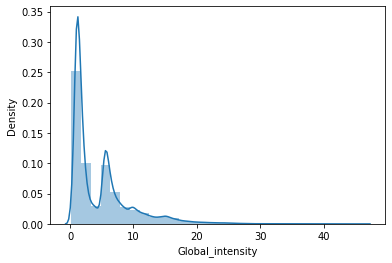

In [27]:
sns.distplot(dataset['Global_intensity'],kde=True,bins=30)

correlation of dataset values

In [28]:
dataset.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
Global_active_power,1.000000,0.254841,-0.400987,0.999020,0.474129,0.456677,0.624107,0.727305
Global_reactive_power,0.254841,1.000000,-0.120617,0.271843,0.137682,0.150528,0.076274,0.218541
Voltage,-0.400987,-0.120617,1.000000,-0.411298,-0.203805,-0.178899,-0.284932,-0.259544
Global_intensity,0.999020,0.271843,-0.411298,1.000000,0.478198,0.462192,0.613220,0.728253
Sub_metering_1,0.474129,0.137682,-0.203805,0.478198,1.000000,0.060830,0.115600,0.118285
Sub_metering_2,0.456677,0.150528,-0.178899,0.462192,0.060830,1.000000,0.106461,0.091897
Sub_metering_3,0.624107,0.076274,-0.284932,0.613220,0.115600,0.106461,1.000000,0.198696
Sub_metering_4,0.727305,0.218541,-0.259544,0.728253,0.118285,0.091897,0.198696,1.000000


Analysis using heatmap

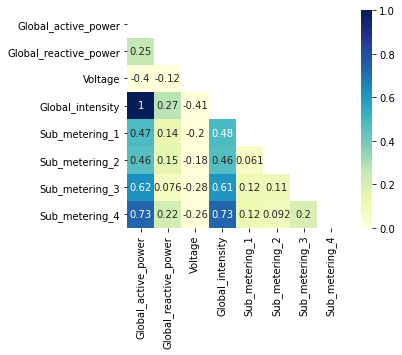

In [29]:
pearson = dataset.corr(method='pearson')
mask = np.zeros_like(pearson)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(pearson, vmax=1, vmin=0, square=True, cbar=True, annot=True, cmap="YlGnBu", mask=mask);

Data Visualization

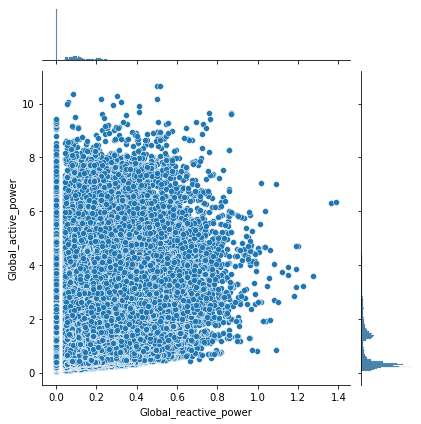

In [30]:
sns.jointplot(x='Global_reactive_power', y='Global_active_power', data=dataset, kind='scatter')

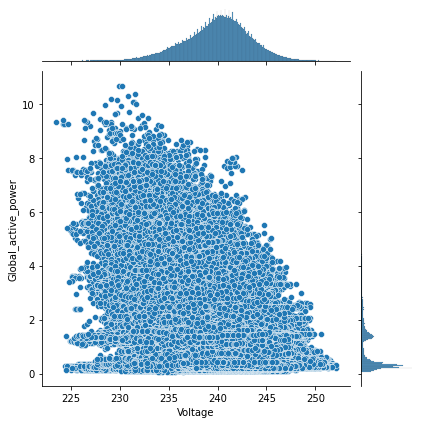

In [31]:
sns.jointplot(x='Voltage', y='Global_active_power', data=dataset, kind='scatter')

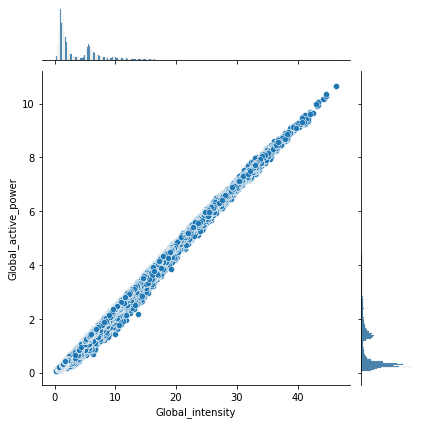

In [32]:
sns.jointplot(x='Global_intensity', y='Global_active_power', data=dataset, kind='scatter')

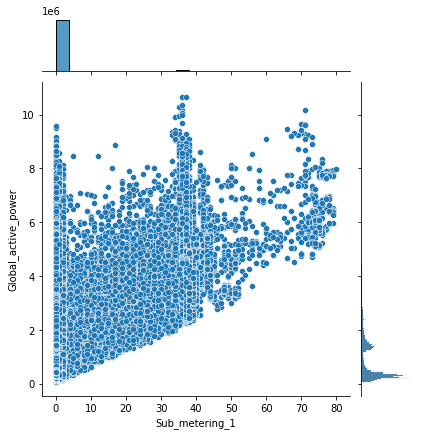

In [33]:
sns.jointplot(x='Sub_metering_1', y='Global_active_power', data=dataset, kind='scatter')

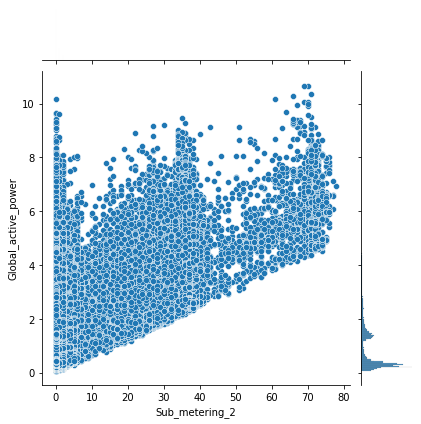

In [34]:
sns.jointplot(x='Sub_metering_2', y='Global_active_power', data=dataset, kind='scatter')

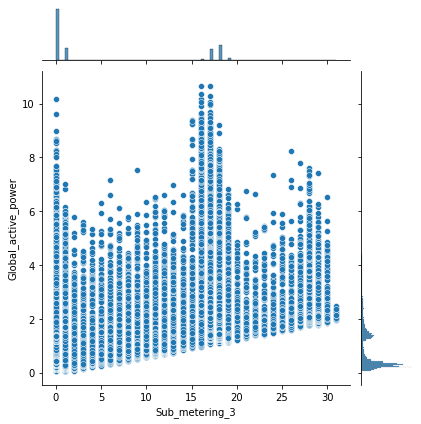

In [35]:
sns.jointplot(x='Sub_metering_3', y='Global_active_power', data=dataset, kind='scatter')

In [36]:
dataset.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Sub_metering_4'],
      dtype='object')

In [37]:
dataset.drop(["Voltage"],axis=1,inplace=True)

In [38]:
dataset.columns

Index(['Global_active_power', 'Global_reactive_power', 'Global_intensity',
       'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Sub_metering_4'],
      dtype='object')

In [39]:
dataset.drop(["Sub_metering_4"],axis=1,inplace=True)

In [40]:
dataset.shape

(1044506, 6)

In [41]:
#independent and dependent variables
x=dataset.iloc[:,1:]
y=dataset.iloc[:,0:1]

In [42]:
x.shape

(1044506, 5)

In [43]:
y.shape

(1044506, 1)

In [44]:
x.head()

,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0.418,18.4,0.0,1.0,17.0
1,0.436,23.0,0.0,1.0,16.0
2,0.498,23.0,0.0,2.0,17.0
3,0.502,23.0,0.0,1.0,17.0
4,0.528,15.8,0.0,1.0,17.0


In [45]:
x.tail()

,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1048570,0.076,1.8,0.0,0.0,0.0
1048571,0.076,1.8,0.0,0.0,0.0
1048572,0.076,1.8,0.0,0.0,0.0
1048573,0.078,1.8,0.0,0.0,0.0
1048574,0.078,1.8,0.0,0.0,0.0


In [46]:
x=dataset.iloc[:,1:].values
y=dataset.iloc[:,0:1].values

In [47]:
x

array([[ 0.418, 18.4  ,  0.   ,  1.   , 17.   ],
       [ 0.436, 23.   ,  0.   ,  1.   , 16.   ],
       [ 0.498, 23.   ,  0.   ,  2.   , 17.   ],
       ...,
       [ 0.076,  1.8  ,  0.   ,  0.   ,  0.   ],
       [ 0.078,  1.8  ,  0.   ,  0.   ,  0.   ],
       [ 0.078,  1.8  ,  0.   ,  0.   ,  0.   ]])

In [48]:
x.ndim

2

In [49]:
x.shape

(1044506, 5)

In [50]:
y

array([[4.216],
       [5.36 ],
       [5.374],
       ...,
       [0.422],
       [0.422],
       [0.422]])

In [51]:
y.ndim

2

In [52]:
y.shape

(1044506, 1)

splitting the data into training set and testing set

In [53]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [54]:
x_train.shape

(835604, 5)

In [55]:
x_test.shape

(208902, 5)

In [56]:
y_train.shape

(835604, 1)

In [57]:
y_test.shape

(208902, 1)

Training Model

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [59]:
lr.fit(x_train,y_train)

LinearRegression()

predictions

In [60]:
y_pred=lr.predict(x_test)

In [61]:
y_pred

array([[0.16898186],
       [3.12323494],
       [0.45635598],
       ...,
       [0.19147388],
       [0.2206757 ],
       [0.31046683]])

In [62]:
y_test

array([[0.174],
       [3.008],
       [0.412],
       ...,
       [0.188],
       [0.242],
       [0.28 ]])

In [63]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_pred)

In [64]:
accuracy*100

99.84903308522661

In [65]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R squares value:',metrics.r2_score(y_test,y_pred))

MAE: 0.02818528636835643
MSE: 0.0019213801760942124
RMSE: 0.04383355080408399
R squares value: 0.998490330852266


In [66]:
import pickle
filename='PCA_model.pkl'
pickle.dump(lr,open(filename,'wb'))